### IMPORTS

In [254]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [256]:
SAVE_PATH = "../saves/"

In [257]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

### Visualization

In [258]:
print(os.listdir(SAVE_PATH))
savefile = os.listdir(SAVE_PATH)[-1]
"Visualizing data from: " + savefile

['pareto.csv', 'saves_1710424156961.csv', 'saves_1710424454746.csv', 'saves_1710424515049.csv', 'saves_1710424637019.csv', 'saves_1710424916129.csv', 'saves_1710429089587.csv', 'saves_1710429514728.csv', 'saves_1710429727788.csv', 'saves_1710429865873.csv', 'saves_1710429985239.csv', 'saves_1710430130919.csv', 'saves_1710430150347.csv', 'saves_1710430307672.csv', 'saves_1710430871920.csv', 'saves_1710431208782.csv', 'saves_1710433005888.csv', 'saves_1710433038829.csv', 'saves_1710433067539.csv', 'saves_1710433104086.csv', 'saves_1710433145786.csv', 'saves_1710433231572.csv', 'saves_1710433284422.csv', 'saves_1710433317750.csv', 'saves_1710433333342.csv', 'saves_1710433396034.csv', 'saves_1710433430620.csv', 'saves_1710433540895.csv', 'saves_1710433601737.csv', 'saves_1710433642142.csv', 'saves_1710433666142.csv', 'saves_1710433698580.csv', 'saves_1710433876094.csv', 'saves_1710436421269.csv', 'saves_1710436501194.csv', 'saves_1710437276237.csv', 'saves_1710437338617.csv', 'saves_171043

'Visualizing data from: saves_1710462741715.csv'

In [259]:
# Read CSV
contracts = pd.read_csv(SAVE_PATH+savefile, sep=';')
contracts.drop_duplicates(inplace=True)
print(contracts.shape)
contracts.head()

(100000, 5)


,utilA,utilB,utilSum,contract,pareto
0,2094,8166,10260,"[174,67,25,48,10,176,83,129,8,84,122,73,74,135...",True
1,2082,8214,10296,"[67,25,174,48,10,176,83,129,8,84,122,73,74,135...",False
2,2124,8241,10365,"[67,48,25,174,10,176,83,129,8,84,122,73,74,135...",False
3,2204,8201,10405,"[67,10,25,48,174,176,83,129,8,84,122,73,74,135...",False
4,2273,8212,10485,"[67,176,25,48,10,174,83,129,8,84,122,73,74,135...",False


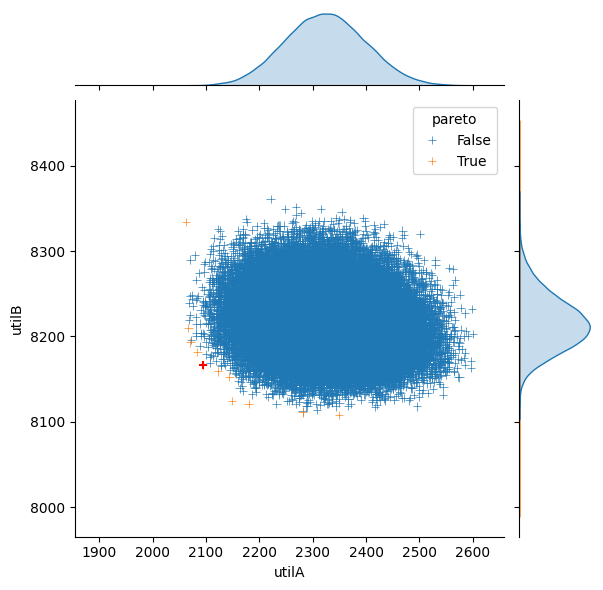

In [260]:
if "pareto" in contracts.columns:
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue="pareto", marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red', marker="+")
else:
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red')

In [261]:
# Determine pareto-efficient contracts if necessary
if "pareto" not in contracts.columns:
    contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
    contracts = contracts.drop_duplicates()
    contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
contracts

,utilA,utilB,utilSum,contract,pareto
0,2094,8166,10260,"[174,67,25,48,10,176,83,129,8,84,122,73,74,135...",True
1,2082,8214,10296,"[67,25,174,48,10,176,83,129,8,84,122,73,74,135...",False
2,2124,8241,10365,"[67,48,25,174,10,176,83,129,8,84,122,73,74,135...",False
3,2204,8201,10405,"[67,10,25,48,174,176,83,129,8,84,122,73,74,135...",False
4,2273,8212,10485,"[67,176,25,48,10,174,83,129,8,84,122,73,74,135...",False
...,...,...,...,...,...
99995,2284,8181,10465,"[174,67,25,48,10,24,83,129,8,84,122,73,74,135,...",False
99996,2241,8210,10451,"[174,67,25,48,10,24,83,129,8,84,122,73,74,135,...",False
99997,2326,8180,10506,"[174,67,25,48,10,24,83,129,8,84,122,73,74,135,...",False
99998,2356,8183,10539,"[174,67,25,48,10,24,83,129,8,84,122,73,74,135,...",False
